# 1. Dealing with Missing Values in Data 


This code example handles missing data in a data set containing information about building permits issued in SanFransisco rom Jan 1st, 2013 to Feb 25th, 2018

In [1]:
# We first import all the libraries we will use in this example
import numpy as np
import pandas as pd


In [2]:
#read the dataset we will use for this exercise
building_permits = pd.read_csv('Building_Permits.csv')

#view information about the dataset just read
building_permits.info()

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

We can see that we have 43 columns and 198900 rows. 

We get an error warning about different object types in certain columns, but that is none of our business here. 

The next step is to check for missing values in our data. 

In [3]:
#Let us first look at the first ten rows to randomly check for missing values. 
building_permits.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


We can see there are several missing values in many columns like - Street Number Suffix, Proposed Construction Type, etc. 

In [4]:
# Next, we check for how many missng values are in each column of the dataset
building_permits.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

We can see that some columns do not have missing values. 

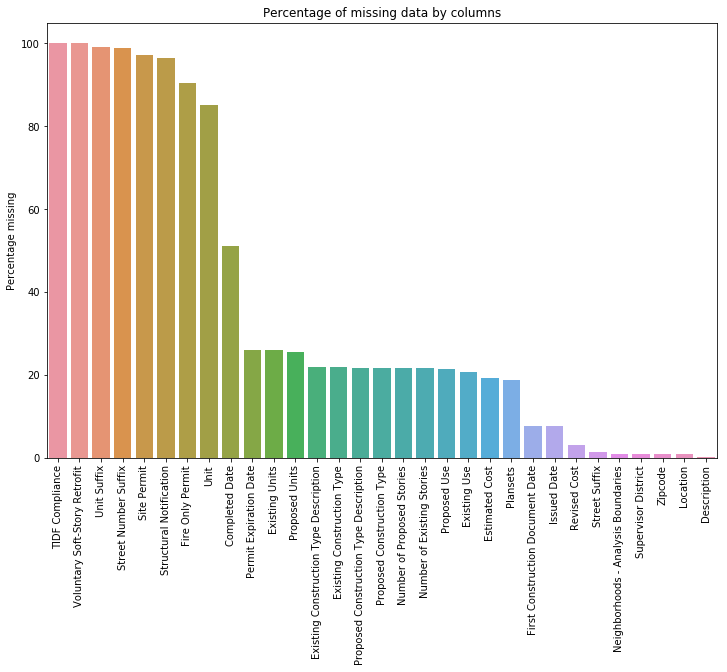

In [5]:
#We can also visualize the percentage of missing values by columns

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# get percentage of missing values
missing_percentage = (building_permits.isnull().sum() / len(building_permits)) * 100

# drop columns without missing values and sort
missing_percentage = missing_percentage.drop(missing_percentage[missing_percentage == 0].index).sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_percentage.index, y=missing_percentage)
ax.set(title='Percentage of missing data by columns', ylabel='Percentage missing')
plt.show()

In [6]:
# Let us find out how many missing values there are in total

building_permits.isnull().sum().sum()

2245941

There are so many missing values! 

Now that we have established that there are missing values in the dataset, how do we handle them?

In order to effectively handle missing values, we need to understand why they are missing. This will guide us in deciding on the best way to handle them. 

There are several causes of missing data values. Some values could be missing because they do not exist, others could be missing because of improper collection of data or poor data entry. 

For example, if someone is single and a question applies to married people, then the question will contain a missing value. In cases like this, it would be wrong to fill in a value for that question. 

In our data, for instance, Street Number Suffix does not always exist, so it would not be ideal to fill it up. However, the missing locations, zipcodes and permit expiration date can be filled up. 

## Handling Missing Values

### i. Droping columns or rows with missing values

This is only advised when the percentage of missing values in a row or column is so high that it does not make sense to keep the column or row. 

For instance, the TDIF compliance column and the Voluntary Soft-Story Retrofit have new 100% missing values, so it makes sense to drop them. We can also decide to drop columns where the missing values are at least 60% of the data

In [7]:
# drop columns where the missing values are at least 60% of the data. 
# We do this by specifying a threshold value and insert it into the drop.na function

thresh = len(building_permits) * .4
building_permits_dropna = building_permits.dropna(thresh = thresh, axis = 1, inplace = True)

The same can also be done for the rows of any data set by just specifying that the axis = 0

### Filling in missing values

If we are dealing with numerical values, we can decide to fill all null variables with 0. We can also decide to fill in all na values with the mean of all the values in the column, or the median. All of these decisions depend on the type of data,what you want to accomplish with the data, and the cause of the missing values. 

In [8]:
# Let us fill up all the missing values in the estimated cost column with 0
building_permits['Estimated Cost'] = building_permits['Estimated Cost'].fillna(0)

building_permits['Estimated Cost'].head(20)


0       4000.0
1          1.0
2      20000.0
3       2000.0
4     100000.0
5       4000.0
6      12000.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13     30000.0
14         0.0
15         0.0
16         0.0
17         0.0
18     75000.0
19         0.0
Name: Estimated Cost, dtype: float64

As you can see, the missing values have been replaced with 0

In [9]:
# We can also fill up all the missing values in the Neighborhoods - Analysis Boundaries column with the most popular value (mode) in the column
building_permits['Neighborhoods - Analysis Boundaries'] = building_permits['Neighborhoods - Analysis Boundaries'].fillna((building_permits['Neighborhoods - Analysis Boundaries'].mode()))

building_permits['Neighborhoods - Analysis Boundaries'].head(20)

0                         Tenderloin
1                         Tenderloin
2                       Russian Hill
3                           Nob Hill
4                         Tenderloin
5                       Potrero Hill
6                       Inner Sunset
7              Bayview Hunters Point
8                  Lone Mountain/USF
9                     Haight Ashbury
10               Castro/Upper Market
11                      Hayes Valley
12                        Noe Valley
13                        Noe Valley
14                   Pacific Heights
15                         Chinatown
16    Financial District/South Beach
17                        Noe Valley
18                            Marina
19               Castro/Upper Market
Name: Neighborhoods - Analysis Boundaries, dtype: object

Finally, we can also decide to fill up missing values with whatever value comes directly after it in the same column. We will also specify that any missing value which does not have any value directly under it will be filled with 0.

In [10]:
building_permits['Supervisor District'] = building_permits['Supervisor District'].fillna(method = 'bfill', axis=0).fillna(0)
building_permits['Supervisor District'].head(20)

0      3.0
1      3.0
2      3.0
3      3.0
4      6.0
5     10.0
6      5.0
7     10.0
8      5.0
9      8.0
10     8.0
11     5.0
12     8.0
13     8.0
14     2.0
15     3.0
16     3.0
17     8.0
18     2.0
19     8.0
Name: Supervisor District, dtype: float64

Now, we move on to handling inconsistent Data Entry

# 2. Dealing with Inconsistent Data Entries

The data to be used here contains information about Suicide Attacks in Pakistan from 1995 to 2016

In [11]:
# Read in the data to be used and view the first ten columns

Pakistan_Suicide_Attacks = pd.read_csv('PakistanSuicideAttacks.csv',encoding='Windows-1252')

Pakistan_Suicide_Attacks.head(10)

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,None,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,None,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
5,6,Thursday-December 25-2003,2 Thw al-Qi`dah 1424 A.H.,Holiday,Christmas/birthday of Quaid-e-Azam,1:40:00 PM/1:42:00 PM,Rawalpindi,33.6058,73.0437,Punjab,...,None,16.0,18.0,NaN,50,2.0,30kg in each car,1.District headquarters \nHospital,9.445,49.001
6,7,Saturday-February 28-2004,8 MuHarram 1425 A.H,Working Day,NaN,NaN,Rawalpindi,33.6058,73.0437,Punjab,...,shiite,NaN,1.0,3.0,4,1.0,NaN,NaN,15.275,59.495
7,8,Friday-May 7-2004,18 Raby` al-awal 1425 A.H,Working Day,NaN,1:20:00/1:17:00 PM,Karachi,24.9918,66.9911,Sindh,...,shiite,14.0,15.0,96.0,200,1.0,2kg,Civil hospital,33.860,92.948
8,9,Monday-May 31-2004,NaN,Working Day,NaN,evening,Karachi,24.9918,66.9911,Sindh,...,Shiite,16.0,18.0,NaN,35,1.0,NaN,Civil hospital-Liaquat National hospital-Jinna...,31.605,88.889
9,10,Thursday-June 3-2004,15 Raby` al-THaany 1425 A.H,Working Day,NaN,NaN,North waziristan,32.9746,70.1456,FATA,...,None,NaN,2.0,NaN,2,1.0,NaN,NaN,27.180,80.924


Let us check the Province column for incosistent data entry. We can do this by checking for all unique entries into that column.

In [12]:
# get all the unique entries in the Province column
province = Pakistan_Suicide_Attacks['Province'].unique()

# sort them alphabetically 
province.sort()
province

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

We can guess that 'Balochistan' are probably meant to be the same 'Baluchistan'. A simple Google search suggests that we are right. Also, 'FATA' and 'Fata' are most likely meant to be the same. 

One of the ways to remove data inconsistencies is by removing whitespaces before or after entry names and by converting all cases to lower cases. For white spaces, if we had something like ' fata' and 'fata', they would be considered two unique values. 

In [13]:
# convert to lower case
Pakistan_Suicide_Attacks['Province'] = Pakistan_Suicide_Attacks['Province'].str.lower()
# remove trailing white spaces
Pakistan_Suicide_Attacks['Province'] = Pakistan_Suicide_Attacks['Province'].str.strip()

# Take another look at the unique entries to check for any changes

province = Pakistan_Suicide_Attacks['Province'].unique()
province.sort()
province

array(['ajk', 'balochistan', 'baluchistan', 'capital', 'fata', 'kpk',
       'punjab', 'sindh'], dtype=object)

Nice, we can see that fata and FATA have been unified

We still have a problem though. We need to unify 'balochistan' and 'baluchistan' entries.  

In [14]:
# Replace entries that contain 'baluchistan' with 'balochistsan'
rows_with_baluchistan = Pakistan_Suicide_Attacks['Province'].isin(['baluchistan'])
Pakistan_Suicide_Attacks.loc[rows_with_baluchistan, 'Province'] = 'balochistan'

In [15]:
# Take another look at the unique entries to check for any changes
province = Pakistan_Suicide_Attacks['Province'].unique()
province.sort()
province

array(['ajk', 'balochistan', 'capital', 'fata', 'kpk', 'punjab', 'sindh'], dtype=object)

Niceee. Seems like we have solved it all. 

NB: If we have a large number of inconsistent unique entries, we cannot check with our eyes like we just did for the closest matches. We can use the Fuzzy Matching. This helps to identify which strings are most likely to be the same. The FuzzyWuzzy package to be used takes in two strings and returns a ratio. The closer the ratio is to 100, the more likely we will unify the strings. A pakcage - Fuzzy Wuzzy - does this well. 




# 3. Handling Dates 


We are often faced with dates in our datasets. And, as beginners, this can often prove daunting. It is even worse when there are inconsistent formats of dates. For instance - dd/mm/yy and mm/dd/yy in the same columns.

Also, our date values might not be in the right data type. We will solve all of that here. 

The data to be used here contains information about a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965. All compiled by The National Earthquake Information Center (NEIC).

In [16]:
earthquakes = pd.read_csv('database.csv')
earthquakes.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [17]:
#let us check for the data type of the date column
earthquakes['Date'].dtype

dtype('O')

If we take a look at the Numpy documentation, the datatype O matches with the Object data type, which is not the date time data type

We proceed to convert our date datatypes to date time data types. 

In [18]:
# import the date time package

import datetime

# we need to specify the format our date is in.
# However our date entries do not have similar formats, so we ask the function to automatically infer the forma

earthquakes['date_converted'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)
earthquakes['date_converted'].head(10)

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
5   1965-01-10
6   1965-01-12
7   1965-01-15
8   1965-01-16
9   1965-01-17
Name: date_converted, dtype: datetime64[ns]

As we can see, the data type has correctly changed to the datetime data type, and now we can perform various date time manipulations on the column because of its data type

Next, we need to be sure all our dates converted well since we asked the function to infer the format. A simple mistake in data entry could lead to a wrong inference

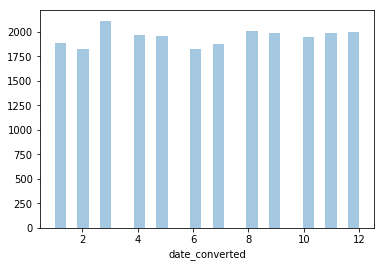

In [19]:
#Let us plot a histogram of the months and ensure the highest value is 12
import seaborn as sns

month_earthquakes = earthquakes['date_converted'].dt.month

# remove na's
month_earthquakes = month_earthquakes.dropna()

# plot the months
sns.distplot(month_earthquakes, kde=False)

As you can see, the highest day is 12, so we are good to go. We can also do the same for the days of the months. The highest value should be 31, and there should be a dip there since not all days of the month have 31 days. 

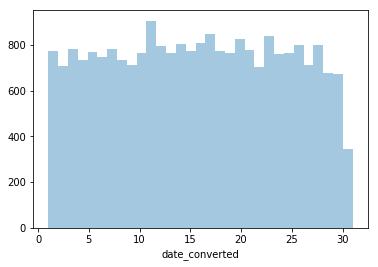

In [20]:
day_earthquakes = earthquakes['date_converted'].dt.day

# remove na's
day_earthquakes = day_earthquakes.dropna()

# plot the months
sns.distplot(day_earthquakes, kde=False, bins =31)

Nice, our hypothesis is correct. 



# 4. Scaling and Normalization 



### Scaling

Scaling is important if one wants to specify that a change in one quantity is not equal to another change in another. This is particularly useful if you want to work with algorithms that treat a change in a numerical feature as an equal change in another numerical feature. Scaling ensures that just because some features are big it won't lead to using them as a main predictor. For instance, if the age and the salary of a person are being used in prediction, some algorithms will pay attention to the salary more because it is bigger. Also, an increase in the age by 1, will be considered similar to an increase in the salary by 1. This does not make sense, so it makes sense to scale your data. 




### Normalization

Normalization basically involves transforming or converting your dataset into a normal distribution. This is useful when you want to use algorithms that work well with normal distributions. Some algorithms like SVM converge far faster on normalized data, so it makes sense to normalize your data to get better results.



The data to be used here contains information about over 300 000 kickstarter projects

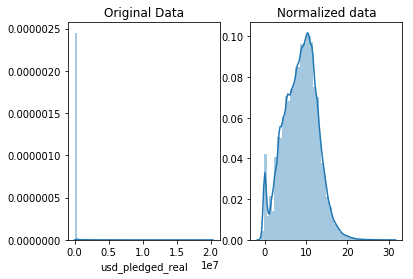

In [21]:
from scipy import stats

kickstarter = pd.read_csv('ks-projects-201801.csv')

index_of_positive_pledges = kickstarter.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarter.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Nice, we can see that our data is now a normal distribution